In [140]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import itertools
from utils import constants as cnst
import numpy.ma as ma
from eod import mfg

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [93]:
cd ..

/home/ck/pythonWorkspace


In [46]:
ar = xr.open_dataset('/home/ck/DIR/cornkle/MCSfiles/VERA_blobs/test_2013_09.nc')

In [47]:
ar

<xarray.Dataset>
Dimensions:         (lat: 273, lon: 601, time: 1400)
Coordinates:
  * lat             (lat) float64 3.912 3.957 4.003 4.048 ... 15.91 15.96 16.0
  * lon             (lon) float64 -16.97 -16.92 -16.88 ... 9.894 9.938 9.983
  * time            (time) datetime64[ns] 2013-09-01 ... 2013-09-30T23:30:00
Data variables:
    blobs           (time, lat, lon) int16 ...
    tir             (time, lat, lon) int16 ...
    power15-19km    (time, lat, lon) uint16 ...
    power32-38km    (time, lat, lon) uint16 ...
    power80-90km    (time, lat, lon) uint16 ...
    power160-170km  (time, lat, lon) uint16 ...
Attributes:
    radii:              [ 2  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  ...
    scales_rounded:     [ 15  16  17  18  19  20  21  22  24  25  27  28  30 ...
    scales_original:    [ 15.          15.89194642  16.83693072  17.83810673 ...
    cutout_T:           -40
    core_minT:          -50
    cutout_minPixelNb:  28

In [52]:
data = ar['blobs'].sum('time')

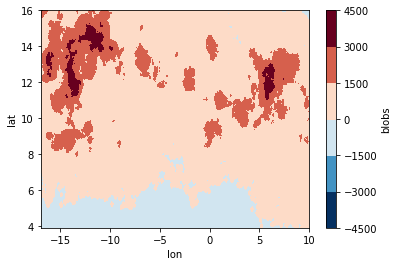

In [53]:
data.plot.contourf()

In [54]:
## a clean way of plotting - use matplotlib functions directly:

def draw_map(data, lon, lat, title=None,  mask_sig=None, quiver=None, contour=None, cbar_label=None, **kwargs):
    f=plt.figure(figsize=(15,7))  # this opens a plot window
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())  # this opens a new plot axis
    mapp = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), **kwargs)  # this is the actual plot
    
    ## mask for significance indicator
    if mask_sig is not None:
         plt.contourf(lon, lat, mask_sig, colors='none', hatches='.',
                     levels=[0.5, 1], linewidth=0.1)
    
    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'], scale=quiver['scale'])
    ## additional contour on plot   
    if contour is not None:
        ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], cmap=contour['cmap'] )
        
    
    ax.coastlines()   ## adds coastlines
    # Gridlines
    xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
    xl.xlabels_top = False   ## labels off
    xl.ylabels_right = False
    plt.title(title)
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
    cbar = plt.colorbar(mapp)  # adds colorbar
    cbar.set_label(cbar_label)
    plt.show()   

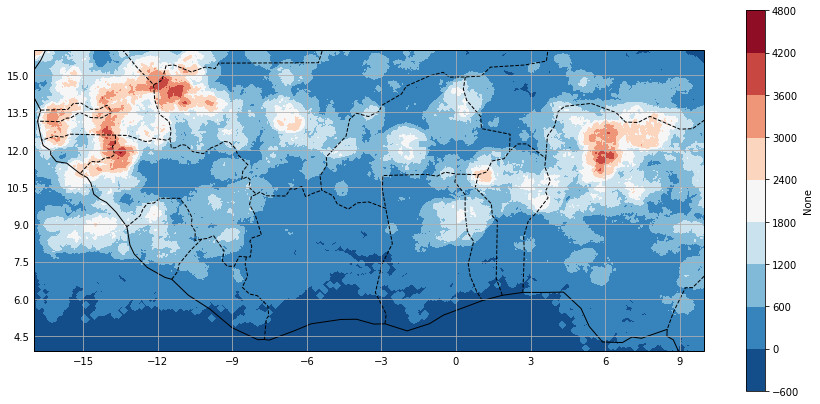

In [55]:
draw_map(data, data.lon, data.lat, cmap='RdBu_r')

In [224]:
month.values[np.isnan(month.values)]=0

In [225]:
trend = calc_trend(month)

Entering trend calc


/home/ck/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ck/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [226]:
vtrend = trend['slope']
mask = trend['ind']

/home/ck/miniconda3/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


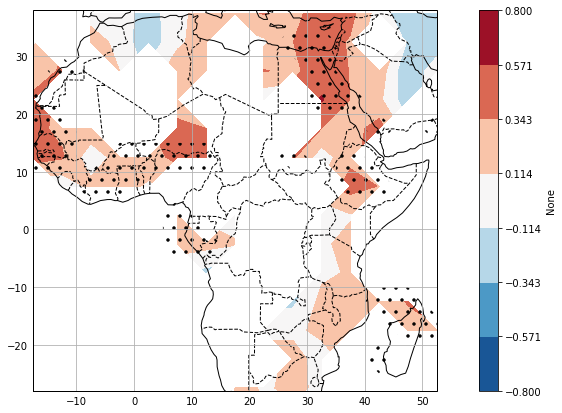

In [227]:
draw_map(vtrend*10, month.longitude, month.latitude, cmap='RdBu_r', levels=np.linspace(-0.8,0.8,8), mask_sig=mask)

In [184]:
msg_folder = cnst.network_data + '/data/OBS/MFG/'
m = mfg.ReadMfg(msg_folder, y1=1999, y2=2000, months=[9])

In [185]:
m.fpath

['/home/ck/DIR/cornkle//data/OBS/MFG/mfg_raw_binary/19990909/tir.gra',
 '/home/ck/DIR/cornkle//data/OBS/MFG/mfg_raw_binary/20000901/tir.gra']

In [251]:
mdic = m.read_data(m.fpath[0], llbox=[-25, 20, 0, 25])
mdic.lat

<xarray.DataArray 'lat' (y: 463, x: 882)>
array([[ 4.871263,  4.871044,  4.870827, ...,  4.888234,  4.888496,  4.888759],
       [ 4.912532,  4.912305,  4.912086, ...,  4.929639,  4.92991 ,  4.930185],
       [ 4.95381 ,  4.953578,  4.953358, ...,  4.971065,  4.971332,  4.971609],
       ...,
       [24.961544, 24.960138, 24.958738, ..., 25.068853, 25.070576, 25.072208],
       [25.009506, 25.008104, 25.006748, ..., 25.11717 , 25.118843, 25.120571],
       [25.05754 , 25.05612 , 25.054783, ..., 25.16543 , 25.167175, 25.168888]],
      dtype=float32)
Coordinates:
    lat      (y, x) float32 4.8712626 4.871044 4.8708267 ... 25.167175 25.168888
    lon      (y, x) float32 -16.78747 -16.744007 ... 22.420078 22.471582
Dimensions without coordinates: y, x

In [252]:
mdic

<xarray.Dataset>
Dimensions:  (time: 48, x: 882, y: 463)
Coordinates:
    lat      (y, x) float32 4.8712626 4.871044 4.8708267 ... 25.167175 25.168888
  * time     (time) datetime64[ns] 1999-09-09 ... 1999-09-09T23:30:00
    lon      (y, x) float32 -16.78747 -16.744007 ... 22.420078 22.471582
Dimensions without coordinates: x, y
Data variables:
    t        (time, y, x) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

In [189]:
mdic['t'][1,:,:].min()

<xarray.DataArray 't' ()>
array(-80, dtype=int32)
Coordinates:
    time     datetime64[ns] 1999-09-09T00:30:00

In [261]:
dat = xr.open_dataset('/home/ck/DIR/cornkle/data/mfg_test.nc' )

In [262]:
dat

<xarray.Dataset>
Dimensions:         (lat: 296, lon: 674, time: 48)
Coordinates:
  * lon             (lon) float64 -17.68 -17.64 -17.59 ... 12.45 12.5 12.54
  * lat             (lat) float64 3.912 3.957 4.003 4.048 ... 16.91 16.95 17.0
  * time            (time) datetime64[ns] 1999-09-09 ... 1999-09-09T23:30:00
Data variables:
    blobs           (time, lat, lon) int16 ...
    tir             (time, lat, lon) int16 ...
    power15-19km    (time, lat, lon) uint16 ...
    power32-38km    (time, lat, lon) uint16 ...
    power80-90km    (time, lat, lon) uint16 ...
    power160-170km  (time, lat, lon) uint16 ...
Attributes:
    radii:              [ 2  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  ...
    scales_rounded:     [ 15  16  17  18  19  20  21  22  24  25  27  28  30 ...
    scales_original:    [ 15.          15.89194642  16.83693072  17.83810673 ...
    cutout_T:           -40
    core_minT:          -50
    cutout_minPixelNb:  28

In [265]:
mean = dat['power15-19km'].mean('time')

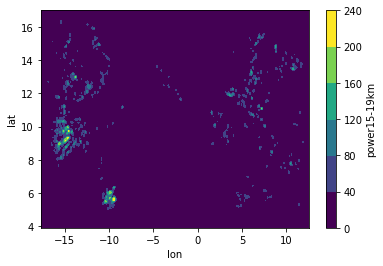

In [266]:
mean.plot.contourf()

In [177]:
dat

<xarray.DataArray (lat: 298, lon: 674)>
array([[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 18.17,  18.56,  17.67, ..., -13.59, -14.59, -15.01],
       [ 18.96,  16.48,  15.98, ..., -14.48, -16.  , -17.49],
       [ 19.74,  16.1 ,  15.19, ..., -14.4 , -15.84, -17.43]])
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.95 17.0 17.04 17.08
    time     datetime64[ns] 1999-09-09T00:30:00
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54

In [192]:
from utils import u_grid, u_interpolate as u_int
import pickle as pkl

In [254]:
gridll = pkl.load( open (cnst.network_data + 'data/OBS/saves/VERA_msg_latlon_18W12E_1N17N.p', 'rb'))

mdic = m.read_data(m.fpath[1], llbox=[-25, 20, 0, 25])  #[-14, 2.5, 4, 11.5]

# make salem grid
grid = u_grid.make(gridll['lon'].values, gridll['lat'].values, 5000)
inds, weights, shape = u_int.interpolation_weights_grid(mdic['lon'].values, mdic['lat'].values, grid)
gridd = (inds,weights,shape, grid)

In [255]:
grid.ll_coordinates[1].shape

(298, 674)

In [256]:
grid.ll_coordinates[1][:,0]

array([ 3.91238713,  3.95749759,  4.00260555,  4.04771099,  4.09281389,
        4.13791422,  4.18301194,  4.22810703,  4.27319947,  4.31828921,
        4.36337625,  4.40846054,  4.45354205,  4.49862077,  4.54369666,
        4.5887697 ,  4.63383985,  4.67890709,  4.72397139,  4.76903272,
        4.81409106,  4.85914637,  4.90419863,  4.94924782,  4.99429389,
        5.03933683,  5.0843766 ,  5.12941319,  5.17444655,  5.21947666,
        5.2645035 ,  5.30952704,  5.35454724,  5.39956409,  5.44457755,
        5.48958759,  5.53459419,  5.57959732,  5.62459695,  5.66959305,
        5.7145856 ,  5.75957457,  5.80455993,  5.84954165,  5.8945197 ,
        5.93949406,  5.9844647 ,  6.02943159,  6.07439471,  6.11935402,
        6.1643095 ,  6.20926111,  6.25420884,  6.29915266,  6.34409253,
        6.38902843,  6.43396034,  6.47888822,  6.52381204,  6.56873179,
        6.61364742,  6.65855892,  6.70346626,  6.7483694 ,  6.79326833,
        6.83816301,  6.88305342,  6.92793952,  6.9728213 ,  7.01

In [246]:
outt.shape

(298, 674)

In [247]:
outt = u_int.interpolate_data(mdic['t'][25,:,:].values, inds, weights, shape)

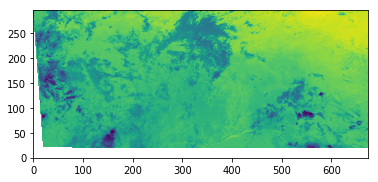

In [248]:
plt.imshow(outt, origin='lower')

In [250]:
outt.shape

(298, 674)